<a href="https://colab.research.google.com/github/KrishnaMoorthy47/Home-Loan-Approval-1/blob/main/HomeLoanApproval_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/loan_sanction_train.csv')

test = pd.read_csv('/content/loan_sanction_test.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df = df.drop('Loan_ID',axis =1)

In [8]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [9]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [10]:
#df.Gender = df.Gender.fillna('Male')

In [11]:
#one_hot = pd.get_dummies(df['Gender'],prefix="Gender",drop_first=True)
#df = df.drop('Gender',axis = 1)
#df = df.join(one_hot)
#df.head()

In [12]:
#df.replace({'Yes':1,'No':0},inplace=True)
#df.head()

In [13]:
print(df.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [14]:
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [15]:
df.Married = df.Married.fillna('Yes')

In [16]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [17]:
df.Dependents = df.Dependents.fillna('0')

In [18]:
df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [19]:
df.Self_Employed = df.Self_Employed.fillna('No')

In [20]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())

In [21]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [22]:
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(360.0)

In [23]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [24]:
df.Credit_History = df.Credit_History.fillna(1.0)

In [25]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
len(df)

614

In [27]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [28]:
#one_hot = pd.get_dummies(df['Gender'],prefix="Gender",drop_first=True)
#df = df.drop('Gender',axis = 1)
#df = df.join(one_hot)

#print(df.head())

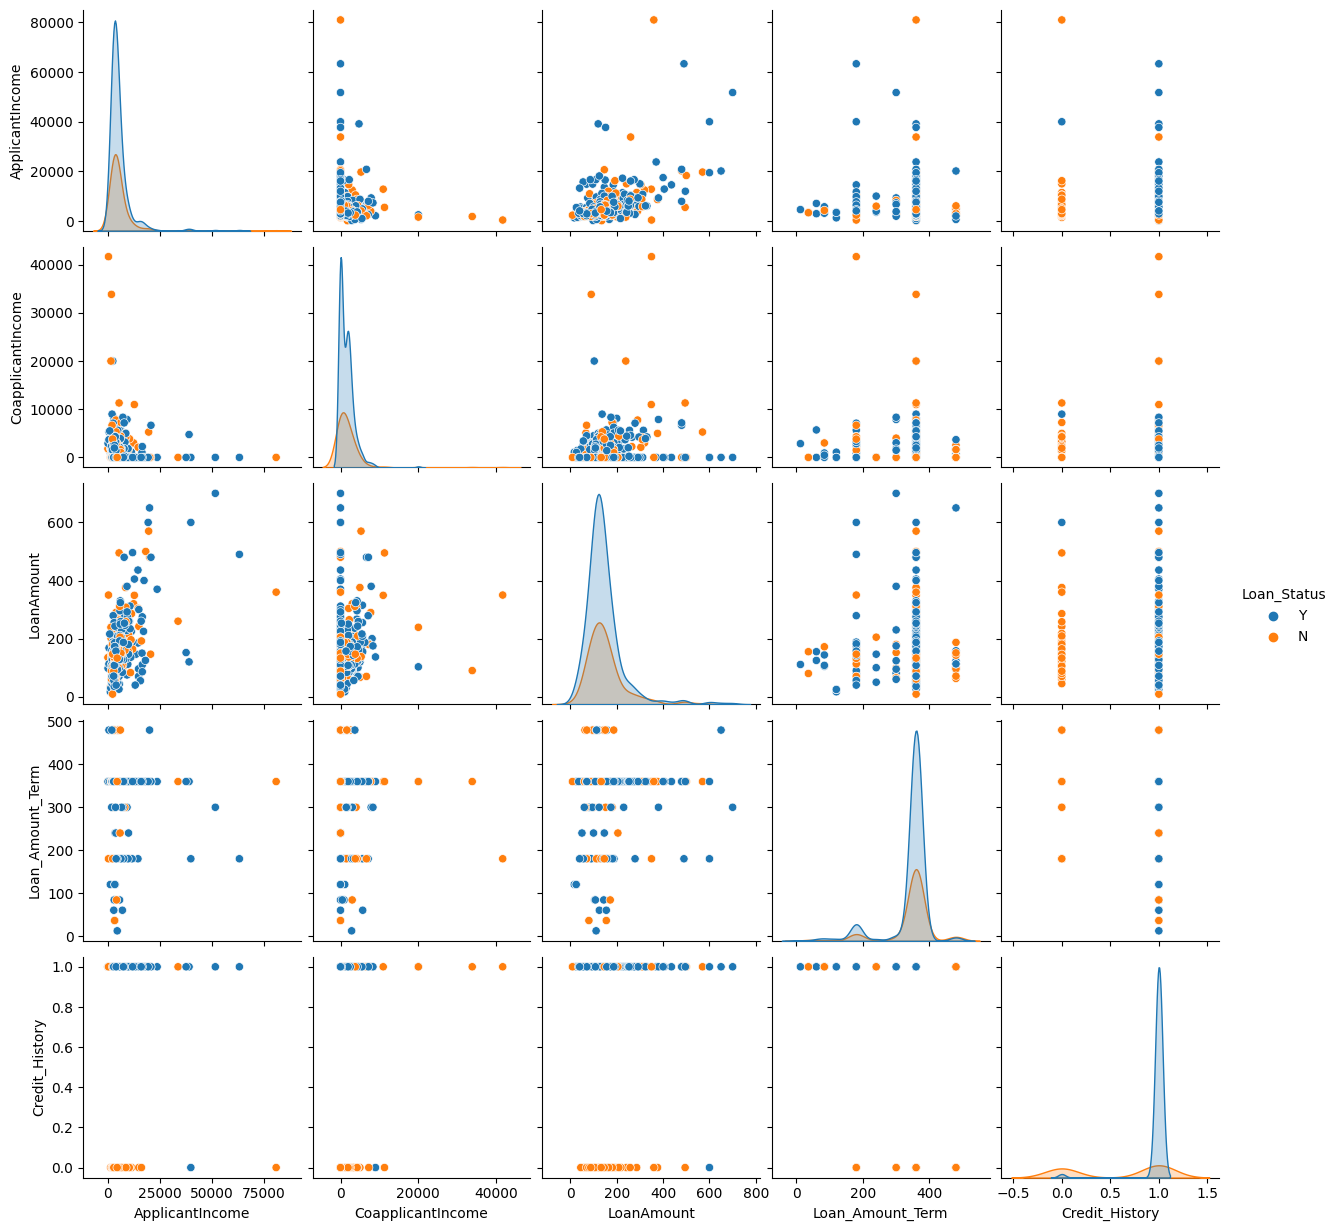

In [29]:
sns.pairplot(data=df,hue='Loan_Status')
plt.show()

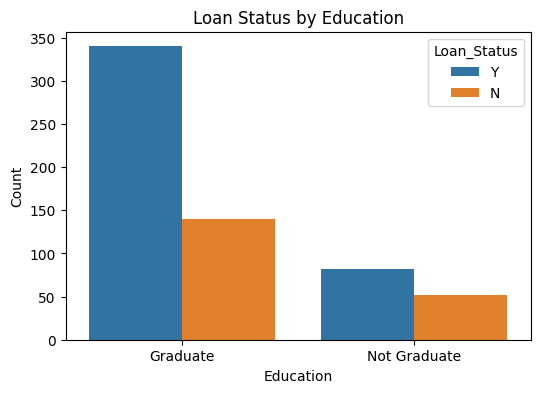

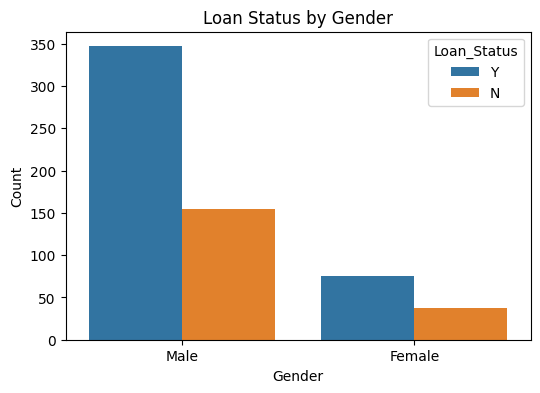

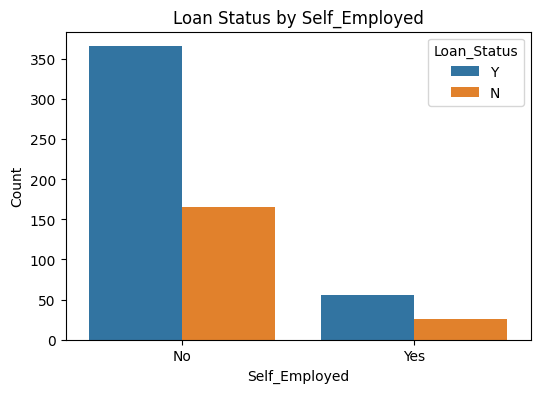

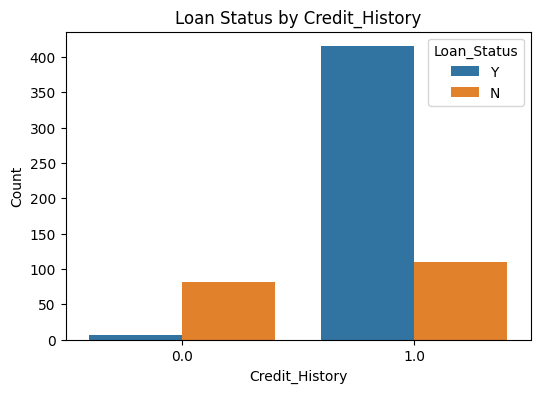

In [30]:
Education_loan=df[['Education', 'Loan_Status']].groupby(['Education', 'Loan_Status']).agg(Count = ('Loan_Status','count')).reset_index()
Gender_loan=df[['Gender', 'Loan_Status']].groupby(['Gender', 'Loan_Status']).agg(Count = ('Loan_Status','count')).reset_index()
Self_Employed=df[['Self_Employed', 'Loan_Status']].groupby(['Self_Employed', 'Loan_Status']).agg(Count = ('Loan_Status','count')).reset_index()
Credit_History=df[['Credit_History', 'Loan_Status']].groupby(['Credit_History', 'Loan_Status']).agg(Count = ('Loan_Status','count')).reset_index()


cols = ['Education', 'Gender', 'Self_Employed', 'Credit_History']

for col in cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Loan_Status', data=df)
    plt.title('Loan Status by {}'.format(col))
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
#for col in ['Education','Gender','Self_Employed','Credit_History']:
  #print('\n\n')
  #df=col+'df'
  #df = pd.DataFrame(eval(df))
  #col_label = col.replace("_", " " )
  #fig1=plt.bar(data_frame=df, x=col, y='Count', color='Loan_Status', barmode='group', color_discrete_sequence=tricolor, text_auto=True, template='simple_white')

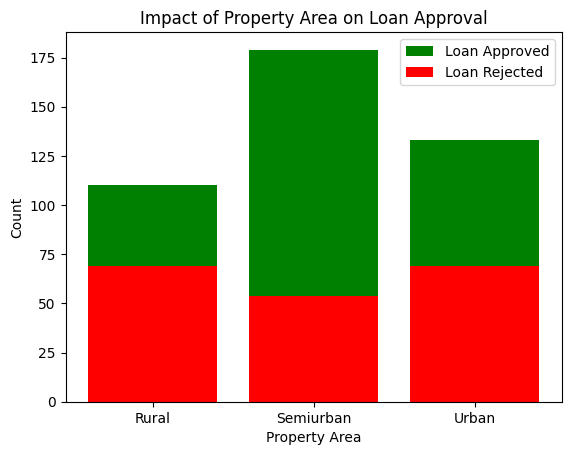

In [31]:
df = df.groupby(['Property_Area', 'Loan_Status']).size().reset_index(name='Count') # group by Property_Area and Loan_Status and count the number of occurrences

# plot the bar chart
fig, ax = plt.subplots()
ax.bar(df[df['Loan_Status'] == 'Y']['Property_Area'], df[df['Loan_Status'] == 'Y']['Count'], 
       color='green', label='Loan Approved')
ax.bar(df[df['Loan_Status'] == 'N']['Property_Area'], df[df['Loan_Status'] == 'N']['Count'], 
       color='red', label='Loan Rejected')
ax.set_xlabel('Property Area')
ax.set_ylabel('Count')
ax.set_title('Impact of Property Area on Loan Approval')
ax.legend()
plt.show()


In [32]:
#property_df = df.groupby(['Property_Area', 'Loan_Status'])['Loan_Status'].count().unstack()
#plt.pie(property_df['Y'], labels=property_df.index, autopct='%1.1f%%')
#plt.title('Loan Approval by Property Area')
#plt.show()

In [33]:
#one_hot = pd.get_dummies(df['Gender'],prefix="Gender",drop_first=True)
#df = df.drop('Gender',axis = 1)
#df = df.join(one_hot)

#print(df.head())

In [34]:
df.columns

Index(['Property_Area', 'Loan_Status', 'Count'], dtype='object')

In [35]:
one_hot = pd.get_dummies(df['Property_Area'],prefix="Property_Area",drop_first=True)
df = df.drop('Property_Area',axis = 1)
df = df.join(one_hot)
df.head()

,Loan_Status,Count,Property_Area_Semiurban,Property_Area_Urban
0,N,69,0,0
1,Y,110,0,0
2,N,54,1,0
3,Y,179,1,0
4,N,69,0,1


In [36]:
def process(df):
  df['Dependents'] = df['Dependents'].replace('3+',3)
  df['Dependents'] = df['Dependents'].astype(int)           #Converting string to int
  
  df['Gender'] = df['Gender'].map({'Male':1,'Female':0})

  df['Married']=df['Married'].map({'Yes':1,'No':0})
  
  df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0})
    
  df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})

  df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})

  #OneHot=OneHotEncoder(sparse=False)
  #transformed=OneHot.fit_transform(df[['Property_Area']])
    
  #df[OneHot.categories_[0]]=transformed
  #df=df.drop('Property_Area',axis=1)

  OneHot = pd.get_dummies(df['Property_Area'],prefix="Property_Area",drop_first=True)
  df = df.drop('Property_Area',axis = 1)
  df = df.join(OneHot)

  df.replace({'Y':1,'N':0},inplace=True)

  return df

In [37]:
print(df.columns)

Index(['Loan_Status', 'Count', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')


In [38]:
df.corr()

<ipython-input-38-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Count,Property_Area_Semiurban,Property_Area_Urban
Count,1.000000,0.229458,-0.021596
Property_Area_Semiurban,0.229458,1.000000,-0.500000
Property_Area_Urban,-0.021596,-0.500000,1.000000


In [40]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LR = LogisticRegression(solver='liblinear')

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [1000]
}

grid_search = GridSearchCV(LR, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)

# Predict on test data using best estimator from GridSearchCV
y_pred = grid_search.predict(X_test)

# Evaluate the performance of the best estimator
score = grid_search.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(score*100))


KeyError: ignored

In [ ]:
x,y = df.drop(columns=['Loan_Status'],axis=1),df.iloc[:,-2]

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params = {'penalty': ['l1', 'l2'], 
              'C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'max_iter': [1000]}

LR = LogisticRegression(solver='liblinear')

Grid = GridSearchCV(LR, param_grid=params, cv=4)

Grid.fit(x_train, y_train)

print("Best parameters: ", Grid.best_params_)
print("Best score: ", Grid.best_score_)


In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state = 0)
LR.fit(x_train, y_train)

In [ ]:
y_pred = LR.predict(x_test)
y_pred

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
print('The accuracy of Logistic Regression is: ', accuracy_score(y_test, y_pred))
print('The Confusion matrix is :', confusion_matrix(y_test,y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score

In [ ]:
RF = RandomForestClassifier(n_estimators=250, random_state=250)
RF.fit(x_train,y_train)

In [ ]:
y_pred = RF.predict(x_test)

In [ ]:
print('The accuracy of Random Forest is: ', accuracy_score(y_test, y_pred))
print('The confusion matrix of Random Forest is: ', confusion_matrix(y_test, y_pred))
print('The f1 score of Random Forest is: ', f1_score(y_test, y_pred))

In [ ]:
feature_importance = RF.feature_importances_

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [5, 10, 15],
              'min_samples_split': [2, 5, 10],
              'criterion': ['gini', 'entropy']}

DTC = DecisionTreeClassifier()

grid_search = GridSearchCV(DTC, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)
y_pred

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve

y_pred = dt.predict(x_test) 

acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

acc = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc))
plot_roc_curve(dt, x_test, y_test)

In [ ]:
from sklearn.model_selection import cross_val_score

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) 
 
  dt.fit(x_train, y_train)

  dt = DecisionTreeClassifier(max_depth=depth)
  valAccuracy = cross_val_score(dt, x_train, y_train, cv=10)

  print("Depth is : ", depth, " Cross val score is : " ,np.mean(valAccuracy))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [5, 10, 15],
              'min_samples_split': [2, 5, 10]}

RFC = RandomForestClassifier()

grid_search = GridSearchCV(RFC, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute']}

KNC = KNeighborsClassifier()

grid_search = GridSearchCV(KNC, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
